# 과제
아래 가이드에 따라 고객별 연간 구매데이터를 생성하고 아래사항을 수행하기(관측치 1,000개)

#### Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.

거래 번호
- id : 1 ~ 1000번 일련번호 - 개시 후 1천 건의 거래가 있었고 거기에 넘버링한 거라고 이해해보자

고객별 속성 데이터
- cusno : 고객번호 1000개 랜덤(1,000명의 고객데이터가 있는 것)
- gender : 0,1 정수 난수 생성
- age : 0 ~ 80사이 정수 난수 생성
- region : 1 ~ 10 사이 정수 난수 생성

거래 데이터
- (date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성)
- (day : 요일)
- (time_20 : 01 ~ 24 사이 정수 난수 생성)
- (time_21 : 01 ~ 24 사이 정수 난수 생성)
- product_20 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10,20,30
- product_21 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10,20,30
- price_20 : 1000 ~ 50000 사이 실수 난수 생성
- price_21 : 1000 ~ 50000 사이 실수 난수 생성
- quantity_20 : 1 ~ 100 사이 정수 난수 생성
- quantity_21 : 1 ~ 100 사이 정수 난수 생성
- amount_20 : price_20 * quantity_20
- amount_21 : price_21 * quantity_21
- sales : 20년 대비 21년구매금액이 증가면 1, 감소면 0



## 컨셉: 쿠팡 구매데이터

## 1. 랜덤 데이터 생성

In [347]:
import pandas as pd
import numpy as np
import random
from datetime import datetime 
import time

### 고객 속성 데이터프레임 만들기

In [348]:
random.seed(1)

#고객별 속성 데이터프레임 만들기

cusno=np.arange(1001,2001)
#cusno=random.sample(list(range(1000,9000)),1000)
gender=np.random.choice([0,1],size=1000)
age=np.random.randint(10,70,size=1000)
region=np.random.randint(1,11,size=1000)   #지역 대신 유입경로 변수로 변환

In [349]:
#배열-> 시리즈
cusno=pd.Series(cusno)
gender=pd.Series(gender)
age=pd.Series(age)
region=pd.Series(region)

#데이터프레임 만들기
customer=pd.concat([cusno,gender,age,region],axis=1)

#컬럼명 지정
customer.columns=['cusno','gender','age','region']

customer.head()

,cusno,gender,age,region
0,1001,0,59,6
1,1002,0,14,5
2,1003,1,54,6
3,1004,0,40,1
4,1005,1,57,2


### 거래 데이터프레임 만들기

In [350]:
#빈 데이터프레임 만들기
purchase=pd.DataFrame(columns=['id','cusno','product','price','quantity','amount'])

In [351]:
#기본 데이터 만들기


#1. 거래 id 만들기
id=random.sample(list(range(10000,50000)),10000)

#2. 중복 cusno 만들기
cusno=np.random.randint(1001,2001,size=10000)      #기존 cusno가 중복될 수 있도록 만들기

#3. 기본거래 데이터 만들기
#product=np.random.choice([10,20,30],size=10000)
product=[random.randrange(10,40,10) for i in range(10000)]
price=np.random.uniform(1000,50000,size=10000).round(2)
quantity=np.random.randint(1,100,size=10000)
amount=price*quantity


In [352]:
#데이터프레임 채우기

purchase['id']=id
purchase['cusno']=cusno
purchase['product']=product
purchase['price']=price
purchase['quantity']=quantity
purchase['amount']=amount


purchase.head()

,id,cusno,product,price,quantity,amount
0,18805,1856,30,43241.11,56,2421502.16
1,47303,1782,10,7343.58,26,190933.08
2,14135,1038,20,7599.43,43,326775.49
3,26716,1631,10,13493.84,1,13493.84
4,17727,1491,30,15068.75,72,1084950.00


In [353]:
#날짜 데이터 만들기

    
#1.date 
date_list=list(pd.date_range('2020-01-01','2021-12-31',freq='D'))     #랜덤 선택을 위한 date 리스트

purchase['date']=np.random.choice(date_list,size=10000)

#2. day(요일) 
purchase['day']=purchase['date'].apply(lambda x: x.weekday())         #date별 요일을 숫자로 나타냄
purchase['day']=purchase['day'].replace(list(range(7)),['월','화','수','목','금','토','일'])

#3. 시간
purchase['time']=np.random.randint(1,25,size=10000)


purchase.head()

,id,cusno,product,price,quantity,amount,date,day,time
0,18805,1856,30,43241.11,56,2421502.16,2021-02-14,일,18
1,47303,1782,10,7343.58,26,190933.08,2021-08-14,토,24
2,14135,1038,20,7599.43,43,326775.49,2020-02-19,수,13
3,26716,1631,10,13493.84,1,13493.84,2020-03-01,일,7
4,17727,1491,30,15068.75,72,1084950.00,2021-04-23,금,20


In [354]:
#거래 데이터타입 확인

purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        10000 non-null  int64         
 1   cusno     10000 non-null  int32         
 2   product   10000 non-null  int64         
 3   price     10000 non-null  float64       
 4   quantity  10000 non-null  int32         
 5   amount    10000 non-null  float64       
 6   date      10000 non-null  datetime64[ns]
 7   day       10000 non-null  object        
 8   time      10000 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(2), object(1)
memory usage: 586.1+ KB


In [355]:
#id 변수 데이터 변환: id 앞에 연도 표시하기

purchase['id']=purchase.apply(lambda x: str(x.date.year-2000)+str(x.id), axis=1)
purchase.head()

,id,cusno,product,price,quantity,amount,date,day,time
0,2118805,1856,30,43241.11,56,2421502.16,2021-02-14,일,18
1,2147303,1782,10,7343.58,26,190933.08,2021-08-14,토,24
2,2014135,1038,20,7599.43,43,326775.49,2020-02-19,수,13
3,2026716,1631,10,13493.84,1,13493.84,2020-03-01,일,7
4,2117727,1491,30,15068.75,72,1084950.00,2021-04-23,금,20


In [356]:
#데이터프레임 통합: 공통 변수 cusno를 활용해 데이터 결합

df=customer.merge(purchase,on='cusno',how='outer')
df.head(10)

,cusno,gender,age,region,id,product,price,quantity,amount,date,day,time
0,1001,0,59,6,2039109,30,40856.91,83,3391123.53,2020-06-07,일,14
1,1001,0,59,6,2136567,30,31225.06,89,2779030.34,2021-08-18,수,9
2,1001,0,59,6,2149529,10,49616.93,31,1538124.83,2021-10-29,금,6
3,1001,0,59,6,2136894,20,8500.06,45,382502.70,2021-05-08,토,4
4,1001,0,59,6,2037995,30,31704.44,69,2187606.36,2020-05-28,목,6
5,1001,0,59,6,2035856,30,40433.24,78,3153792.72,2020-09-10,목,7
6,1001,0,59,6,2033565,10,46703.28,92,4296701.76,2020-11-28,토,24
7,1001,0,59,6,2116091,10,5976.62,81,484106.22,2021-07-21,수,10
8,1001,0,59,6,2044811,10,4505.06,2,9010.12,2020-02-15,토,3
9,1001,0,59,6,2047477,10,9434.55,81,764198.55,2020-02-22,토,16


In [357]:
#데이터프레임 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   cusno     10000 non-null  int32         
 1   gender    10000 non-null  int32         
 2   age       10000 non-null  int32         
 3   region    10000 non-null  int32         
 4   id        10000 non-null  object        
 5   product   10000 non-null  int64         
 6   price     10000 non-null  float64       
 7   quantity  10000 non-null  int32         
 8   amount    10000 non-null  float64       
 9   date      10000 non-null  datetime64[ns]
 10  day       10000 non-null  object        
 11  time      10000 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(6), int64(1), object(2)
memory usage: 781.2+ KB


---

## 2. 데이터 전처리

### 변수의 데이터타입 변환

In [358]:
#gender 변수 문자화

df['gender'].replace({0:'male',1:'female'}, inplace=True)
df.head()

,cusno,gender,age,region,id,product,price,quantity,amount,date,day,time
0,1001,male,59,6,2039109,30,40856.91,83,3391123.53,2020-06-07,일,14
1,1001,male,59,6,2136567,30,31225.06,89,2779030.34,2021-08-18,수,9
2,1001,male,59,6,2149529,10,49616.93,31,1538124.83,2021-10-29,금,6
3,1001,male,59,6,2136894,20,8500.06,45,382502.70,2021-05-08,토,4
4,1001,male,59,6,2037995,30,31704.44,69,2187606.36,2020-05-28,목,6


In [359]:
#region 변수 문자화

df['region'].replace({1:'서울', 
                      2:'경기',
                      3:'부산',
                      4:'강원',
                      5:'충북',
                      6:'충남',
                      7:'전남',
                      8:'전북',
                      9:'경남',
                      10:'경북',                      
                     },inplace=True)
df.head()

,cusno,gender,age,region,id,product,price,quantity,amount,date,day,time
0,1001,male,59,충남,2039109,30,40856.91,83,3391123.53,2020-06-07,일,14
1,1001,male,59,충남,2136567,30,31225.06,89,2779030.34,2021-08-18,수,9
2,1001,male,59,충남,2149529,10,49616.93,31,1538124.83,2021-10-29,금,6
3,1001,male,59,충남,2136894,20,8500.06,45,382502.70,2021-05-08,토,4
4,1001,male,59,충남,2037995,30,31704.44,69,2187606.36,2020-05-28,목,6


In [360]:
#age 범주화

def age_category(x):
    y=0
    if x<20:
        y='10대'
    elif x<30:
        y='20대'
    elif x<40:
        y='30대'
    elif x<50:
        y='40대'
    elif x<60:
        y='50대'
    else:
        y='60대'
    return y

df['age_c']=df['age'].apply(age_category)
df.head()

,cusno,gender,age,region,id,product,price,quantity,amount,date,day,time,age_c
0,1001,male,59,충남,2039109,30,40856.91,83,3391123.53,2020-06-07,일,14,50대
1,1001,male,59,충남,2136567,30,31225.06,89,2779030.34,2021-08-18,수,9,50대
2,1001,male,59,충남,2149529,10,49616.93,31,1538124.83,2021-10-29,금,6,50대
3,1001,male,59,충남,2136894,20,8500.06,45,382502.70,2021-05-08,토,4,50대
4,1001,male,59,충남,2037995,30,31704.44,69,2187606.36,2020-05-28,목,6,50대


### 변수 추가 생성/ 기존 데이터 수정

In [361]:
#유입 경로 코드 추가
'''
1: sns 홍보사이트(인스타)
2: 온라인사이트
3: 가격비교 사이트(naver 검색)
4: 쿠팡 어플

'''

df['funnels']=np.random.randint(1,5,size=10000)
df['funnels'].replace([1,2,3,4],['sns 홍보사이트','온라인사이트','가격비교 사이트','쿠팡 어플'])
df.head()

,cusno,gender,age,region,id,product,price,quantity,amount,date,day,time,age_c,funnels
0,1001,male,59,충남,2039109,30,40856.91,83,3391123.53,2020-06-07,일,14,50대,1
1,1001,male,59,충남,2136567,30,31225.06,89,2779030.34,2021-08-18,수,9,50대,1
2,1001,male,59,충남,2149529,10,49616.93,31,1538124.83,2021-10-29,금,6,50대,2
3,1001,male,59,충남,2136894,20,8500.06,45,382502.70,2021-05-08,토,4,50대,4
4,1001,male,59,충남,2037995,30,31704.44,69,2187606.36,2020-05-28,목,6,50대,4


In [362]:
#세부 제품코드 추가
'''
- product: 
*30. 저가제품
1: 도서/문화
2: 식품

*20. 중가제품
3: 패션/뷰티 
4: 스포츠/레저
5: 가구/생활

*10. 고가제품
6: 항공권, 
7:호텔/리조트
8: 디지털/가전

'''


def detail(x):
    if x==30:
        return np.random.choice(['도서/문화','식품'])
    elif x==20:
        return np.random.choice(['패션/뷰티','스포츠/레저','가구/생활'])
    elif x==10:
        return np.random.choice(['항공','호텔/리조트','디지털/가전'])
    
df['detail_product']=df['product'].apply(detail)
df.head()

,cusno,gender,age,region,id,product,price,quantity,amount,date,day,time,age_c,funnels,detail_product
0,1001,male,59,충남,2039109,30,40856.91,83,3391123.53,2020-06-07,일,14,50대,1,도서/문화
1,1001,male,59,충남,2136567,30,31225.06,89,2779030.34,2021-08-18,수,9,50대,1,도서/문화
2,1001,male,59,충남,2149529,10,49616.93,31,1538124.83,2021-10-29,금,6,50대,2,항공
3,1001,male,59,충남,2136894,20,8500.06,45,382502.70,2021-05-08,토,4,50대,4,스포츠/레저
4,1001,male,59,충남,2037995,30,31704.44,69,2187606.36,2020-05-28,목,6,50대,4,식품


In [363]:
#제품코드에 따라 price, quantity, amount, sales 수정


#price, quantity 수정: 고가제품은 구매수량 적게, 저가제품은 구매수량 구간을 크게
def price_set(x):
    y=0
    if x==10: 
        y= np.random.uniform(200000,500001)
    elif x==20:
        y= np.random.uniform(30000,200001)
    elif x==30: 
        y= np.random.uniform(1000,30001)
    return y

def quantity_set(x):
    z=0
    if x==10: 
        z= np.random.randint(1,11)
    elif x==20:
        z= np.random.randint(1,50)
    elif x==30: 
        z= np.random.randint(1,100)
    return z

df['price']=df['product'].apply(price_set).round(2)
df['quantity']=df['product'].apply(quantity_set)


#amount 수정

df['amount']=df['price']*df['quantity']


df.head()

,cusno,gender,age,region,id,product,price,quantity,amount,date,day,time,age_c,funnels,detail_product
0,1001,male,59,충남,2039109,30,10642.70,64,681132.80,2020-06-07,일,14,50대,1,도서/문화
1,1001,male,59,충남,2136567,30,10581.43,4,42325.72,2021-08-18,수,9,50대,1,도서/문화
2,1001,male,59,충남,2149529,10,460426.18,4,1841704.72,2021-10-29,금,6,50대,2,항공
3,1001,male,59,충남,2136894,20,190475.60,32,6095219.20,2021-05-08,토,4,50대,4,스포츠/레저
4,1001,male,59,충남,2037995,30,6434.01,12,77208.12,2020-05-28,목,6,50대,4,식품


In [364]:
#데이터 순서를 날짜, 시간으로 정렬

df=df.sort_values(['date','time'],ignore_index=True)  #정렬 순서대로 인덱스 reset
df.head()

,cusno,gender,age,region,id,product,price,quantity,amount,date,day,time,age_c,funnels,detail_product
0,1152,male,15,경남,2019767,30,7318.00,65,475670.00,2020-01-01,수,6,10대,3,식품
1,1362,female,51,전남,2011142,30,7773.33,82,637413.06,2020-01-01,수,8,50대,3,식품
2,1029,female,36,전남,2035442,20,134700.86,23,3098119.78,2020-01-01,수,9,30대,2,패션/뷰티
3,1716,female,65,부산,2013410,30,6102.21,40,244088.40,2020-01-01,수,10,60대,3,도서/문화
4,1028,male,44,전북,2047651,10,473123.34,2,946246.68,2020-01-01,수,13,40대,2,항공


In [365]:
#데이터프레임 컬럼 순서 바꾸기

df=df[['id','cusno','gender','region','age','age_c','product','detail_product','price',
           'quantity','amount','date','day','time']]
df.head()

,id,cusno,gender,region,age,age_c,product,detail_product,price,quantity,amount,date,day,time
0,2019767,1152,male,경남,15,10대,30,식품,7318.00,65,475670.00,2020-01-01,수,6
1,2011142,1362,female,전남,51,50대,30,식품,7773.33,82,637413.06,2020-01-01,수,8
2,2035442,1029,female,전남,36,30대,20,패션/뷰티,134700.86,23,3098119.78,2020-01-01,수,9
3,2013410,1716,female,부산,65,60대,30,도서/문화,6102.21,40,244088.40,2020-01-01,수,10
4,2047651,1028,male,전북,44,40대,10,항공,473123.34,2,946246.68,2020-01-01,수,13


### 데이터 확인

In [366]:
#연도별 피벗테이블 작성을 위해 연도 변수 생성

df['year']=df['date'].dt.year
df.head()

,id,cusno,gender,region,age,age_c,product,detail_product,price,quantity,amount,date,day,time,year
0,2019767,1152,male,경남,15,10대,30,식품,7318.00,65,475670.00,2020-01-01,수,6,2020
1,2011142,1362,female,전남,51,50대,30,식품,7773.33,82,637413.06,2020-01-01,수,8,2020
2,2035442,1029,female,전남,36,30대,20,패션/뷰티,134700.86,23,3098119.78,2020-01-01,수,9,2020
3,2013410,1716,female,부산,65,60대,30,도서/문화,6102.21,40,244088.40,2020-01-01,수,10,2020
4,2047651,1028,male,전북,44,40대,10,항공,473123.34,2,946246.68,2020-01-01,수,13,2020


In [367]:
#20년도 연령별/세부제품별 구매량

pd.crosstab(index=df[df['year']==2020].detail_product,  
                                   columns=df[df['year']==2020].age_c)


age_c,10대,20대,30대,40대,50대,60대
detail_product,,,,,,
가구/생활,86,79,89,79,104,94
도서/문화,154,125,116,114,167,151
디지털/가전,106,82,86,88,98,100
스포츠/레저,98,66,89,88,103,90
식품,154,146,105,113,137,126
패션/뷰티,124,76,91,92,115,98
항공,108,73,89,89,104,110
호텔/리조트,105,82,94,78,110,114


In [368]:
#21년도 연령별/세부제품별  구매량

pd.crosstab(index=df[df['year']==2021].detail_product,
                                   columns=df[df['year']==2021].age_c)

age_c,10대,20대,30대,40대,50대,60대
detail_product,,,,,,
가구/생활,98,93,82,87,96,109
도서/문화,151,122,148,103,167,131
디지털/가전,97,94,91,95,101,99
스포츠/레저,107,70,74,81,104,89
식품,151,130,133,138,146,152
패션/뷰티,89,87,96,83,113,103
항공,98,87,76,81,113,89
호텔/리조트,131,89,71,81,79,110


In [369]:
#10,60대의 구매가 많음
#10대는 구매 여력이 없고,
#60대는 온라인몰이라는 특성상 많은 구매가 없을 거라고 생각

In [370]:
#연도별/세부 제품별 총 구매수량 및 총 구매액을 알기 위한 피벗테이블 작성

pd.options.display.float_format = '{:.2f}'.format    #과학적 표기법 x


table1=pd.pivot_table(df,
                     columns=['year','detail_product'],    
                     values='amount',
                     aggfunc=['count','sum']
                    )

table1.T.applymap(lambda x: f'{x: 0,.2f}')

#20,21년도 간 구매수량, 구매액의 차이가 크게 없음

amount
      year detail_product                   
count 2020 가구/생활                      531.00
           도서/문화                      827.00
           디지털/가전                     560.00
           스포츠/레저                     534.00
           식품                         781.00
           패션/뷰티                      596.00
           항공                         573.00
           호텔/리조트                     583.00
      2021 가구/생활                      565.00
           도서/문화                      822.00
           디지털/가전                     577.00
           스포츠/레저                     525.00
           식품                         850.00
           패션/뷰티                      571.00
           항공                         544.00
           호텔/리조트                     561.00
sum   2020 가구/생활            1,509,673,863.19
           도서/문화              638,563,394.33
           디지털/가전           1,085,594,216.65
           스포츠/레저           1,633,959,422.17
           식품                 617,398,191.89
           패션/뷰티            1,804,431,317.95
           항공               1,134,532,803.71
           호텔/리조트           1,129,481,895.70
      2021 가구/생활            1,603,143,504.72
           도서/문화              666,126,391.63
           디지털/가전           1,130,908,387.99
           스포츠/레저           1,614,721,112.64
           식품                 660,558,635.52
           패션/뷰티            1,701,647,209.67
           항공               1,057,006,778.97
           호텔/리조트           1,089,150,381.42

In [371]:
pd.reset_option('display.float_format')

In [372]:
#고객번호에 따라 연도별 총 구매수량,총 구매액을 알기 위한 피벗테이블 작성

table2=pd.pivot_table(df,
                     index=['cusno','gender','age_c'],
                     columns='year',
                     values='amount',
                     aggfunc=['count','sum']
                     )
table2.applymap(lambda x: f'{x: 0,.2f}').head(10)

#연도별 조금씩 차이가 있어보이긴함
#20년도에 null값이 존재하는 것도 보임-> 유입고객변수여부 만들어보기, 이탈여부도 만들어보기

count                    sum                
year                  2020   2021            2020            2021
cusno gender age_c                                               
1001  male   50대      6.00   4.00    9,748,026.27    9,034,574.43
1002  male   10대      6.00   5.00    6,658,934.54   14,729,671.30
1003  female 50대      7.00   3.00   16,512,059.23    3,423,943.64
1004  male   40대      4.00   2.00    5,226,918.81    3,979,074.45
1005  female 50대      5.00   5.00   13,660,628.32    4,853,958.71
1006  male   30대      4.00   3.00   10,824,723.44    7,811,564.41
1007  male   40대       nan   9.00             nan   14,798,178.74
1008  female 10대      5.00   3.00    9,135,345.92    6,596,929.86
1009  male   50대     11.00   6.00   25,857,124.17    9,331,412.47
1010  female 10대      3.00   4.00    3,608,673.70    8,085,793.66

In [373]:
#연산하기 위해 null값을 0으로 변경

table2.fillna(0,inplace=True)
table2['count']=table2['count'].astype(int)    #구매횟수를 정수화

In [374]:
#(21-20)총 구매횟수 차이 구하기
table2['count_df']=table2.iloc[:,1]-table2.iloc[:,0]

#(21-20)총 구매액 차이 구하기
table2['amount_df']=table2.iloc[:,3]-table2.iloc[:,2]

#총 구매액이 증가했는지 여부 확인하는 sales 변수 생성
table2['sales']=np.where(table2['amount_df']>=0,1,0)

#21년도 이탈 고객 여부 변수 생성
table2['leave']=np.where(table2.iloc[:,1]==0,1,0)  

#21년도 새로 유입된 고객 여부 변수 생성
table2['welcome']=np.where(table2.iloc[:,0]==0,1,0)


In [375]:
# 컬럼이름 바꿔주고 인덱스 삭제

table2.columns=['count_2020','count_2021','amount_2020','amount_2021', 'count_df',
              'amount_df','sales','leave','welcome']

table2.reset_index(inplace=True)
table2.head(10)

,cusno,gender,age_c,count_2020,count_2021,amount_2020,amount_2021,count_df,amount_df,sales,leave,welcome
0,1001,male,50대,6,4,9748026.27,9034574.43,-2,-713451.84,0,0,0
1,1002,male,10대,6,5,6658934.54,14729671.30,-1,8070736.76,1,0,0
2,1003,female,50대,7,3,16512059.23,3423943.64,-4,-13088115.59,0,0,0
3,1004,male,40대,4,2,5226918.81,3979074.45,-2,-1247844.36,0,0,0
4,1005,female,50대,5,5,13660628.32,4853958.71,0,-8806669.61,0,0,0
5,1006,male,30대,4,3,10824723.44,7811564.41,-1,-3013159.03,0,0,0
6,1007,male,40대,0,9,0.00,14798178.74,9,14798178.74,1,0,1
7,1008,female,10대,5,3,9135345.92,6596929.86,-2,-2538416.06,0,0,0
8,1009,male,50대,11,6,25857124.17,9331412.47,-5,-16525711.70,0,0,0
9,1010,female,10대,3,4,3608673.70,8085793.66,1,4477119.96,1,0,0


In [376]:
#연도별 총 구매 횟수 확인

table2.count_2020.sum(), table2.count_2021.sum() 

(4985, 5015)

In [377]:
#연도별 총 구매액 확인

table2.amount_2020.sum(),table2.amount_2021.sum()

#크게 차이가 없음

(9553635105.59, 9523262402.56)

## 인사이트 도출을 위한 데이터 수정

#### 데이터 기본 조작

 1. 10대, 60대 수 줄이고, 20,30,40대 늘리기
 2. 10대들의 구매는 도서/문화, 패션/뷰티에 집중적
 3. 60대들의 구매는 도서/문화를 줄이고 항공(은퇴 후 시간이 많이 남아서), 레저/스포츠(산 많이 다니니까)에 집중적

- ※ 데이터를 수정하면서, 연령이 바뀌다보니 고유번호인 cusno변수에 문제가 생김!
- ※ 따라서, 데이터 수정을 전체적으로 진행하면서 변화된 고객데이터는 cusno를 null값으로 변환해주고,이후에 cusno변수를 일괄적으로 연령/성별/지역에 따라 일괄적으로 수정하기로 함

In [378]:
#10대 불린인덱싱

teenager=df[(df['age']<20)]
print(len(teenager))

1857


In [379]:
# 제품별 데이터 세부내역 수정: 10대 구매는 도서/문화, 패션/뷰티 집중적

for idx in random.sample(list(teenager.index),1200):   #랜덤으로 1200개 골라서 데이터 변환 진행
    if df.loc[idx,'detail_product'] in ['도서/문화','패션/뷰티']:   #도서/문화, 패션/뷰티는 그대로
        pass
    else:
        
        # 10대의 구매건수를 줄이기 위해 20,30,40대로 바꿔줌
        df.loc[idx,'cusno']=np.nan                         
        df.loc[idx,'age']=random.randint(20,49)
        df.loc[idx,'age_c']=str(df.loc[idx,'age'])[0]+'0대'
        
        # 나머지 세부 제품별 product, price, quantity를 조정해줌
        if df.loc[idx,'detail_product']== ['식품']:                       
            df.loc[idx,'product']=30
            df.loc[idx,'price']=np.random.uniform(1000,30001)
            df.loc[idx,'quantity']=np.random.randint(1,100)
            
        elif df.loc[idx,'detail_product'] in ['스포츠/레저','가구/생활']:
            df.loc[idx,'product']=20
            df.loc[idx,'price']=np.random.uniform(30000,20000)
            df.loc[idx,'quantity']=np.random.randint(1,50) 
            
        elif df.loc[idx,'detail_product'] in ['항공','호텔/리조트','디지털/가전']:
            df.loc[idx,'product']=10
            df.loc[idx,'price']=np.random.uniform(200000,500001)
            df.loc[idx,'quantity']=np.random.randint(10,11)
            
        # amount역시 다시 수정    
        df.loc[idx,'amount']=df.loc[idx,'price']*df.loc[idx,'quantity']    

In [380]:
#10대 불린인덱싱: 1200개 중에서 도서/문화, 패션/뷰티 제외한 데이터가 수정됐음을 알 수 있음

teenager=df[(df['age']<20)]
print(len(teenager))

996


In [381]:
#60대 

elder=df[(df['age']>=60)]    
print(len(elder))

1765


In [382]:
# 제품별 데이터 세부내역 수정

for idx in random.sample(list(elder.index),900):      #랜덤으로 900개 골라서 데이터 변환 진행  
    if df.loc[idx,'detail_product'] in ['항공','호텔/리조트','스포츠/레저']:   #항공, 호텔/리조트,스포츠/레저는 그대로
        pass
    else:

        # 60대의 구매건수를 줄이기 위해 20,30,40,50대로 바꿔줌
        df.loc[idx,'cusno']=np.nan
        df.loc[idx,'age']=random.randint(20,59)
        df.loc[idx,'age_c']=str(df.loc[idx,'age'])[0]+'0대'
        
        # 나머지 세부 제품별 product, price, quantity를 조정해줌
        if df.loc[idx,'detail_product']== ['식품','도서/문화']:
            df.loc[idx,'product']=30
            df.loc[idx,'price']=np.random.uniform(1000,30001)
            df.loc[idx,'quantity']=np.random.randint(1,100)
        elif df.loc[idx,'detail_product'] in ['패션/뷰티','가구/생활']:
            df.loc[idx,'product']=20
            df.loc[idx,'price']=np.random.uniform(30000,20000)
            df.loc[idx,'quantity']=np.random.randint(1,50) 
        elif df.loc[idx,'detail_product'] in ['디지털/가전']:
            df.loc[idx,'product']=10
            df.loc[idx,'price']=np.random.uniform(200000,500001)
            df.loc[idx,'quantity']=np.random.randint(10,11)
            
        # amount역시 다시 수정 
        df.loc[idx,'amount']=df.loc[idx,'price']*df.loc[idx,'quantity']    


In [383]:
elder=df[(df['age']>=60)]    
print(len(elder))

1191


In [384]:
#20년도 연령별 세부제품 구매 수량 확인

pd.crosstab(index=df[df['year']==2020].detail_product,
                                   columns=df[df['year']==2020].age_c)


age_c,10대,20대,30대,40대,50대,60대
detail_product,,,,,,
가구/생활,31,111,116,105,121,47
도서/문화,154,144,136,124,187,82
디지털/가전,40,117,114,134,111,44
스포츠/레저,31,86,111,113,103,90
식품,60,195,154,161,150,61
패션/뷰티,124,88,106,106,125,47
항공,36,98,109,116,104,110
호텔/리조트,40,98,118,103,110,114


In [385]:
#21년도 연령별 세부제품 구매 수량 확인

pd.crosstab(index=df[df['year']==2021].detail_product,
                                   columns=df[df['year']==2021].age_c)

age_c,10대,20대,30대,40대,50대,60대
detail_product,,,,,,
가구/생활,40,117,118,121,111,58
도서/문화,151,146,161,116,180,68
디지털/가전,32,131,126,133,109,46
스포츠/레저,31,99,102,100,104,89
식품,60,180,179,182,166,83
패션/뷰티,89,104,105,91,129,53
항공,34,106,99,103,113,89
호텔/리조트,43,112,103,114,79,110


In [386]:
#10대의 도서/문화, 패션/뷰티를 제외하고 구매량이 감소한 것을 확인
#60대도 항공, 호텔/리조트,스포츠/레저 제외하고 어느정도 구매량이 감소한 것을 확인

#### 고객의 구매 감소 요인 만들기
- 배경: 지속된 코로나 상황에서 n인 이상 집합 금지로 스포츠 활동이 줄어들었으며, 이용가능한 호텔 객실 수 감소, 마스크 미착용 시 벌금 부여 등 거리두기가 강화된 상황 

- 어떤 인사이트를 도출할까?
1. 스포츠/레저를 즐겨사는 20-30대 남자들 구매가 감소

2. 20-30대 후반의 패션/뷰티 제품 구매가 감소함  

3. 21년도 고가제품보다 중저가 제품이 많아짐
    - 21년도 항공,호텔/리조트 등 고가제품 구매가 감소함
    - 30-50대 여성의 식품, 가구/생활, 중저가 제품 구매가 증가함
    - 10-20대의 도서/문화 저가 제품 구매가 증가함 

#### 20년도 항공기 예약 건수를 줄이기-> 패션/뷰티, 레저/스포츠 20,30대의 구매 건수 증가 
- 21년도 구매감소를 확연하게 보여주기 위함


In [387]:
#세부제품이 항공인 것을 불린인덱싱

airplane20=df[(df['detail_product']=='항공')&(df['date'].dt.year==2020)]
len(airplane20)

573

In [388]:

for idx in random.sample(list(airplane20.index),300):      #랜덤으로 300개 골라서 데이터 변환 진행  
    df.loc[idx,'cusno']=np.nan
    df.loc[idx,'detail_product']=random.choice(['패션/뷰티','스포츠/레저'])
    df.loc[idx,'age']=random.randint(20,39)
    df.loc[idx,'age_c']=str(df.loc[idx,'age'])[0]+'0대'
    df.loc[idx,'product']=20
    df.loc[idx,'price']=np.random.uniform(30000,200001)
    df.loc[idx,'quantity']=np.random.randint(10,50)
    df.loc[idx,'amount']=df.loc[idx,'price']*df.loc[idx,'quantity']
    
    #패션/뷰티는 여자, 스포츠/레저는 남자로 변환
    if df.loc[idx,'detail_product']=='패션/뷰티':
        df.loc[idx,'gender']='female'
    elif df.loc[idx,'detail_product']=='스포츠/레저':
        df.loc[idx,'gender']='male'

In [389]:
#세부제품이 항공인 것을 불린인덱싱

airplane20=df[(df['detail_product']=='항공')&(df['date'].dt.year==2020)]
airplane20

,id,cusno,gender,region,age,age_c,product,detail_product,price,quantity,amount,date,day,time,year
4,2047651,1028.0,male,전북,44,40대,10,항공,473123.340000,2,9.462467e+05,2020-01-01,수,13,2020
11,2027752,1195.0,female,충북,49,40대,10,항공,389935.350000,7,2.729547e+06,2020-01-01,수,23,2020
19,2010996,1750.0,female,전남,34,30대,10,항공,284355.210000,9,2.559197e+06,2020-01-02,목,21,2020
33,2022398,1724.0,male,전남,64,60대,10,항공,278398.380000,4,1.113594e+06,2020-01-03,금,24,2020
74,2044382,1550.0,male,경북,54,50대,10,항공,491303.770000,2,9.826075e+05,2020-01-06,월,10,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4858,2036306,1872.0,male,충남,36,30대,10,항공,455910.860000,6,2.735465e+06,2020-12-23,수,3,2020
4891,2020464,1753.0,male,경남,53,50대,10,항공,299120.260000,3,8.973608e+05,2020-12-25,금,20,2020
4943,2025003,1148.0,female,경기,54,50대,10,항공,490946.790000,3,1.472840e+06,2020-12-29,화,6,2020
4945,2045418,NaN,female,전북,47,40대,10,항공,361819.672846,10,3.618197e+06,2020-12-29,화,15,2020


#### 21년도 항공기 예약 건수를 줄이기-> 40,50대의 식품 구매 건수 증가/30, 40,50대의 가구/생활 구매 건수 증가

In [390]:
#세부제품이 항공인 것을 불린인덱싱

airplane21=df[(df['detail_product']=='항공')&(df['date'].dt.year==2021)]
len(airplane21)

544

In [391]:
for idx in random.sample(list(airplane21.index),400): #랜덤으로 400개 골라서 데이터 변환 진행
    
    #세부제품을 식품, 가구/생활로 변환
    df.loc[idx,'detail_product']=random.choice(['식품','가구/생활'])
    df.loc[idx,'cusno']=np.nan
    
    #식품의 경우 30,40,50대 여자가 되도록
    if df.loc[idx,'detail_product']=='식품':
        df.loc[idx,'gender']=random.choice(['female'])
        df.loc[idx,'age']=random.randint(30,49)
        df.loc[idx,'age_c']=str(df.loc[idx,'age'])[0]+'0대'
        df.loc[idx,'product']=30
        df.loc[idx,'price']=np.random.uniform(1000,30001)
        df.loc[idx,'quantity']=np.random.randint(1,100)
        df.loc[idx,'amount']=df.loc[idx,'price']*df.loc[idx,'quantity']
        
    #가구/생활의 경우 30,40,50대가 되도록
    elif df.loc[idx,'detail_product']=='가구/생활':
        df.loc[idx,'detail_product']=random.choice(['가구/생활'])
        df.loc[idx,'gender']=random.choice(['female','male'])
        df.loc[idx,'age']=random.randint(30,59)
        df.loc[idx,'age_c']=str(df.loc[idx,'age'])[0]+'0대'
        df.loc[idx,'product']=20
        df.loc[idx,'price']=np.random.uniform(30000,200001)
        df.loc[idx,'quantity']=np.random.randint(1,20)
        df.loc[idx,'amount']=df.loc[idx,'price']*df.loc[idx,'quantity']

In [392]:
#세부제품이 항공인 것을 불린인덱싱

airplane21=df[(df['detail_product']=='항공')&(df['date'].dt.year==2021)]
airplane21

,id,cusno,gender,region,age,age_c,product,detail_product,price,quantity,amount,date,day,time,year
5082,2110307,1868.0,female,충남,17,10대,10,항공,244112.74,2,488225.48,2021-01-07,목,10,2021
5139,2115965,1863.0,male,충남,65,60대,10,항공,343451.51,3,1030354.53,2021-01-12,화,20,2021
5154,2139416,1925.0,male,전북,46,40대,10,항공,238405.47,5,1192027.35,2021-01-14,목,3,2021
5167,2114015,1073.0,male,서울,27,20대,10,항공,327745.15,8,2621961.20,2021-01-14,목,22,2021
5175,2148639,1719.0,female,부산,44,40대,10,항공,443499.97,5,2217499.85,2021-01-15,금,6,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9862,2139784,1220.0,male,충북,59,50대,10,항공,280583.92,3,841751.76,2021-12-21,화,8,2021
9899,2147104,1437.0,male,경기,56,50대,10,항공,247262.90,6,1483577.40,2021-12-23,목,20,2021
9918,2131794,1297.0,male,충남,62,60대,10,항공,286036.75,4,1144147.00,2021-12-25,토,6,2021
9954,2127430,1434.0,female,경북,33,30대,10,항공,430133.83,4,1720535.32,2021-12-28,화,5,2021


In [393]:
df.head()

,id,cusno,gender,region,age,age_c,product,detail_product,price,quantity,amount,date,day,time,year
0,2019767,NaN,male,경남,37,30대,30,식품,7318.00,65,475670.00,2020-01-01,수,6,2020
1,2011142,1362.0,female,전남,51,50대,30,식품,7773.33,82,637413.06,2020-01-01,수,8,2020
2,2035442,1029.0,female,전남,36,30대,20,패션/뷰티,134700.86,23,3098119.78,2020-01-01,수,9,2020
3,2013410,NaN,female,부산,38,30대,30,도서/문화,6102.21,40,244088.40,2020-01-01,수,10,2020
4,2047651,1028.0,male,전북,44,40대,10,항공,473123.34,2,946246.68,2020-01-01,수,13,2020


### 데이터 확인

In [394]:
#데이터에 수정을 가해서 cusno를 null값으로 바꿔준 고객 수 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10000 non-null  object        
 1   cusno           7960 non-null   float64       
 2   gender          10000 non-null  object        
 3   region          10000 non-null  object        
 4   age             10000 non-null  int32         
 5   age_c           10000 non-null  object        
 6   product         10000 non-null  int64         
 7   detail_product  10000 non-null  object        
 8   price           10000 non-null  float64       
 9   quantity        10000 non-null  int64         
 10  amount          10000 non-null  float64       
 11  date            10000 non-null  datetime64[ns]
 12  day             10000 non-null  object        
 13  time            10000 non-null  int32         
 14  year            10000 non-null  int64         
dtypes: 

In [395]:
df['cusno'].value_counts()

1443.0    18
1566.0    18
1100.0    18
1493.0    17
1782.0    17
          ..
1849.0     1
1983.0     1
1890.0     1
1035.0     1
1343.0     1
Name: cusno, Length: 1000, dtype: int64

In [396]:
df[df['cusno'].isnull()]

,id,cusno,gender,region,age,age_c,product,detail_product,price,quantity,amount,date,day,time,year
0,2019767,NaN,male,경남,37,30대,30,식품,7318.000000,65,4.756700e+05,2020-01-01,수,6,2020
3,2013410,NaN,female,부산,38,30대,30,도서/문화,6102.210000,40,2.440884e+05,2020-01-01,수,10,2020
8,2028603,NaN,male,부산,25,20대,20,스포츠/레저,162069.839952,19,3.079327e+06,2020-01-01,수,18,2020
13,2033572,NaN,male,서울,58,50대,30,도서/문화,23058.010000,52,1.199017e+06,2020-01-02,목,7,2020
16,2039854,NaN,male,경남,59,50대,20,가구/생활,20401.351839,24,4.896324e+05,2020-01-02,목,13,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,2127880,NaN,female,경기,36,30대,30,식품,5599.057432,12,6.718869e+04,2021-12-30,목,4,2021
9982,2140851,NaN,female,서울,49,40대,10,디지털/가전,452369.288872,10,4.523693e+06,2021-12-30,목,24,2021
9985,2110400,NaN,male,경기,32,30대,20,패션/뷰티,25647.243587,13,3.334142e+05,2021-12-31,금,6,2021
9986,2111389,NaN,male,전남,48,40대,20,스포츠/레저,26114.248732,47,1.227370e+06,2021-12-31,금,8,2021


In [397]:
# cusno 그룹화 후 일괄 수정
#while문을 왜 사용했는가? --> for문을 한번 실행해서 단번에 만번이 채워지지 않았음

#그룹화
group=df.groupby(['gender','region','age_c'])


category=[]

for g in ['male','female']:
    for r in set(df['region']):
        for a in set(df['age_c']):
             category.append([g,r,a,list(group.get_group((g,r,a)).index)])

In [398]:
#cusno 수정

while True:
    for i,j,k,m in category:

        filter_condition=(df['cusno'].isnull())&(df['gender']==i)&(df['region']==j)&(df['age_c']==k)
        idx_filter=list(df[filter_condition].index)

        for idx in idx_filter:
            df.loc[idx,'cusno']=df.loc[np.random.choice(m),'cusno']
    if df.isnull().sum().sum()==0:
        break
      

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10000 non-null  object        
 1   cusno           10000 non-null  float64       
 2   gender          10000 non-null  object        
 3   region          10000 non-null  object        
 4   age             10000 non-null  int32         
 5   age_c           10000 non-null  object        
 6   product         10000 non-null  int64         
 7   detail_product  10000 non-null  object        
 8   price           10000 non-null  float64       
 9   quantity        10000 non-null  int64         
 10  amount          10000 non-null  float64       
 11  date            10000 non-null  datetime64[ns]
 12  day             10000 non-null  object        
 13  time            10000 non-null  int32         
 14  year            10000 non-null  int64         
dtypes: 

In [400]:
#cusno가 잘 배정됐는지 확인
#cusno별로 그룹화해서 성별, 연령대, 지역 고유 개수가 한개인지 확인

for i in range(1001,1001+len(set(df['cusno']))):
    try:
        g=df.groupby('cusno').get_group(i)      
        if len(set(g['gender']))>1:
            print(g['cusno'])
        if len(set(g['region']))>1:
            print(g['cusno'])
        if len(set(g['age_c']))>1:
            print(g['cusno'])
    except:
        pass

### 변수 추가

In [401]:
'''
1: 이벤트 여부: 쿠팡멤버쉽(쿠팡플레이 연계)(21년도만)
2: 첫구매 할인(20,21년도 처음 구매하는 사람만 min date)
0: 없음
'''


#처음 구매하는 사람들 중 80%를 40/50대로, 첫구매 할인 이벤트로 유입됨
#21년도 구매 고객 80% 중에서 쿠팡멤버쉽은 20/30대 50%, 40/50대인 경우 50%


'\n1: 이벤트 여부: 쿠팡멤버쉽(쿠팡플레이 연계)(21년도만)\n2: 첫구매 할인(20,21년도 처음 구매하는 사람만 min date)\n0: 없음\n'

- event: 첫구매 할인

In [402]:
df['event']=np.nan

grouped=df.groupby('cusno')

idx=[]
for i in range(1001,2001):           # 그룹별로 date 오름차순 정렬 이후, 인덱스 추출
    try:                             # 데이터 수정 이후, 빠진 cusno 번호가 있기 때문에 예외처리문 작성
        first=grouped.get_group(i).sort_values(['date']).index[0]
        idx.append(first)
    except:
        pass
    
len(idx)

1000

In [403]:
#첫구매 고객 중 80%의 40,50대가 '첫구매 할인' 혜택을 적용받음

r_idx=random.sample(idx,int(len(idx)*0.8))

for i in r_idx:
    if df.iloc[i]['age_c'] in ['40대','50대']:
        df.loc[i,'event']='첫구매 할인'

In [404]:
#첫구매 고객 중 80%의 20,30대가 '첫구매 할인' 혜택을 적용받음

r_idx=random.sample(idx,int(len(idx)*0.2))

for i in r_idx:
    if df.iloc[i]['age_c'] in ['20대','30대']:
        df.loc[i,'event']='첫구매 할인'

In [405]:
df[['age_c','event']].value_counts()

age_c  event 
50대    첫구매 할인    142
40대    첫구매 할인    121
20대    첫구매 할인     40
30대    첫구매 할인     25
dtype: int64

- event: 쿠팡멤버쉽

In [406]:
# pd.options.display.max_rows= 60
grouped=df.groupby('cusno')

idx=df[(df['year']==2021)&(df['event']!='첫구매 할인')&(df['age']<55)&(df['age']>20)].index


#21년도 구매자 중 50%가 쿠팡멤버쉽
r_idx=random.sample(list(idx),int(len(idx)*0.5))

for i in r_idx:
    df.loc[i,'event']='쿠팡 멤버쉽'


In [407]:
df[['event','age_c']].value_counts()

event   age_c
쿠팡 멤버쉽  30대      544
        40대      517
        20대      419
        50대      269
첫구매 할인  50대      142
        40대      121
        20대       40
        30대       25
dtype: int64

In [408]:
#연도별 피벗테이블 작성을 위해 연도 변수 생성

df['year']=df['date'].dt.year
df.head()

,id,cusno,gender,region,age,age_c,product,detail_product,price,quantity,amount,date,day,time,year,event
0,2019767,1336.0,male,경남,37,30대,30,식품,7318.00,65,475670.00,2020-01-01,수,6,2020,NaN
1,2011142,1362.0,female,전남,51,50대,30,식품,7773.33,82,637413.06,2020-01-01,수,8,2020,첫구매 할인
2,2035442,1029.0,female,전남,36,30대,20,패션/뷰티,134700.86,23,3098119.78,2020-01-01,수,9,2020,첫구매 할인
3,2013410,1512.0,female,부산,38,30대,30,도서/문화,6102.21,40,244088.40,2020-01-01,수,10,2020,NaN
4,2047651,1028.0,male,전북,44,40대,10,항공,473123.34,2,946246.68,2020-01-01,수,13,2020,NaN


In [411]:
#연도별/세부 제품별 총 구매수량 및 총 구매액을 알기 위한 피벗테이블 작성

#pd.options.display.float_format = '{:.2f}'.format    #과학적 표기법 x


table3=pd.pivot_table(df,
                     columns=['year','detail_product'],
                     values='amount',
                     aggfunc=['count','sum']
                    )


c3=table3.loc[:,'count'][2020].T.merge(table3.loc[:,'count'][2021].T, on='detail_product')
c3.columns=['2020','2021']
c3['2021-2020 difference']=c3['2021']-c3['2020']
c3

# 스포츠/레저, 패션/뷰티 구매량이 감소
# 가구/생활, 식품 구매량이 증가

,2020,2021,2021-2020 difference
detail_product,,,
가구/생활,531,742,211
도서/문화,827,822,-5
디지털/가전,560,577,17
스포츠/레저,692,525,-167
식품,781,1073,292
패션/뷰티,738,571,-167
항공,273,144,-129
호텔/리조트,583,561,-22


In [412]:
s3=table3.loc[:,'sum'][2020].T.merge(table3.loc[:,'sum'][2021].T, on='detail_product')
s3.columns=['2020','2021']
s3['2021-2020 difference']=s3['2021']-s3['2020']

s3.applymap(lambda x: f'{x:,.2f}')

# 억단위로 보자
# 스포츠/레저, 패션/뷰티, 항공 구매액 감소
# 가구/생활, 식품 구매액 증가

,2020,2021,2021-2020 difference
detail_product,,,
가구/생활,"1,280,076,178.44","1,557,864,994.46","277,788,816.03"
도서/문화,"638,563,394.33","666,126,391.63","27,562,997.30"
디지털/가전,"1,290,851,637.05","1,308,387,660.33","17,536,023.28"
스포츠/레저,"2,012,385,843.88","1,400,027,239.05","-612,358,604.83"
식품,"617,398,191.89","833,755,492.09","216,357,300.20"
패션/뷰티,"2,188,429,670.55","1,560,657,618.22","-627,772,052.33"
항공,"578,346,743.93","277,487,172.97","-300,859,570.96"
호텔/리조트,"1,235,301,014.88","1,221,551,663.18","-13,749,351.70"


In [413]:
#연도별 총 구매수량 및 총 구매액을 알기 위한 피벗테이블 작성

pd.options.display.float_format = '{:.2f}'.format    #과학적 표기법 x
table4=pd.pivot_table(df,
                     index='cusno',
                     columns='year',
                     values='amount',
                     aggfunc=['count','sum']
                    )

table4.applymap(lambda x: f'{x:,.2f}').head(10)

count                  sum              
year      2020  2021           2020          2021
cusno                                            
1001.00   6.00  3.00   7,202,664.02  7,192,869.71
1002.00   5.00  2.00   5,559,694.14  2,594,394.96
1003.00   7.00  3.00  16,512,059.23  2,298,615.98
1004.00   4.00  5.00   5,226,918.81  8,024,586.84
1005.00   5.00  5.00  13,660,628.32  4,853,958.71
1006.00   6.00  4.00  16,456,865.01  8,699,935.30
1007.00   3.00  6.00   4,159,985.24  9,076,781.78
1008.00   3.00  1.00   7,962,996.92     11,699.58
1009.00  11.00  6.00  25,857,124.17  9,331,412.47
1010.00   1.00  1.00   1,316,077.36    564,562.39

In [414]:
#null값을 0으로 변경

table4.fillna(0,inplace=True)
table4['count']=table4['count'].astype(int)

In [415]:
#(20-21)총 구매횟수 차이 구하기
table4['count_df']=table4.iloc[:,0]-table4.iloc[:,1]

#(20-21)총 구매액 차이 구하기
table4['amount_df']=table4.iloc[:,2]-table4.iloc[:,3]

#(20-21)총 구매액 증감율 구하기
table4['amount_df_per']=table4.iloc[:,3]/table4.iloc[:,2]

#20년 대비 구매액 증감율
table4['amount_df_per_20']=table4['amount_df']/table4.iloc[:,2]

#총 구매액이 증가했는지 여부 확인하는 sales 변수 생성
table4['sales']=np.where(table4['amount_df']>0,1,0)   #감소가 1

#21년도 이탈 고객 여부 변수 생성
table4['leave']=np.where(table4.iloc[:,1]==0,1,0)

#21년도 새로 유입된 고객 여부 변수 생성
table4['welcome']=np.where(table4.iloc[:,0]==0,1,0)



In [416]:
# 컬럼이름 바꿔주고 인덱스 삭제

table4.columns=['count_2020','count_2021','amount_2020','amount_2021', 'count_df',
              'amount_df','amount_df_per','amount_df_per_20', 'sales','leave','welcome']
table4.reset_index(inplace=True)
table4.head()

,cusno,count_2020,count_2021,amount_2020,amount_2021,count_df,amount_df,amount_df_per,amount_df_per_20,sales,leave,welcome
0,1001.00,6,3,7202664.02,7192869.71,3,9794.31,1.00,0.00,1,0,0
1,1002.00,5,2,5559694.14,2594394.96,3,2965299.18,0.47,0.53,1,0,0
2,1003.00,7,3,16512059.23,2298615.98,4,14213443.25,0.14,0.86,1,0,0
3,1004.00,4,5,5226918.81,8024586.84,-1,-2797668.03,1.54,-0.54,0,0,0
4,1005.00,5,5,13660628.32,4853958.71,0,8806669.61,0.36,0.64,1,0,0


In [417]:
#20년도 대비 21년도 구매가 감소한 고객 수

table4.sales.value_counts()

#감소 고객수가 많은편이나 크게 차이는 나지 않음

1    546
0    454
Name: sales, dtype: int64

In [418]:
#20년도 대비 21년도 구매가 감소한 평균 금액 수

f'{table4.amount_df.mean(): ,.2f}원'

' 1,015,494.44원'

## 인사이트 도출

- 아무것도 모르는 척 데이터 탐색하기

In [419]:
#연도별 총 구매 횟수 확인

table4.count_2020.sum(), table4.count_2021.sum() 

#구매횟수의 차이는 크지 않음

(4985, 5015)

In [421]:
#연도별 총 구매액 및 차액 확인

print(f'2020년도 총 구매액: {table4.amount_2020.sum():,.2f}원')
print(f'2021년도 총 구매액: {table4.amount_2021.sum():,.2f}원')
print(f'총 구매액 차이: {(table4.amount_2021.sum()-table4.amount_2020.sum()):,.2f}원' )

#그러나 총구매액은 억대로 감소함

2020년도 총 구매액: 9,841,352,674.94원
2021년도 총 구매액: 8,825,858,231.93원
총 구매액 차이: -1,015,494,443.02원


In [423]:
#데이터 살펴보기


import warnings
warnings.filterwarnings(('ignore'))



#세부 제품별, 연도별 구매수량과 차이 확인 
table3=pd.pivot_table(df,
                     columns=['year','detail_product'],
                     values='amount',
                     aggfunc=['count','sum']
                    )

table5=table3[('count',2020)].append(table3[('count',2021)])
table5=table5.append(table5.iloc[1]-table5.iloc[0]).T

table5.columns=['2020년도','2021년도','구매 수량 차이(21년도-20년도)']
table5.T

#스포츠/레저, 패션/뷰티 부문에서 많이 줄어든 것을 알 수 있음
#하지만, 가구/생활, 식품 부문 등은 증가함

detail_product,가구/생활,도서/문화,디지털/가전,스포츠/레저,식품,패션/뷰티,항공,호텔/리조트
2020년도,531,827,560,692,781,738,273,583
2021년도,742,822,577,525,1073,571,144,561
구매 수량 차이(21년도-20년도),211,-5,17,-167,292,-167,-129,-22


In [424]:
#세부 제품별, 연도별 구매액과 차이 확인

table6=table3[('sum',2020)].append(table3[('sum',2021)])
table6=table6.append(table6.iloc[1]-table6.iloc[0])

table6.index=['2020년도','2021년도','구매액 차이(21년도-20년도)']
table6.applymap(lambda x: f'{x: 0,.2f}')

#구매액으로 찾아본 결과,
#억단위로 증가한 제품은 가구/생활, 식품
#억단위로 감소한 제품은 스포츠/레저, 패션/뷰티임

detail_product,가구/생활,도서/문화,디지털/가전,스포츠/레저,식품,패션/뷰티,항공,호텔/리조트
2020년도,"1,280,076,178.44","638,563,394.33","1,290,851,637.05","2,012,385,843.88","617,398,191.89","2,188,429,670.55","578,346,743.93","1,235,301,014.88"
2021년도,"1,557,864,994.46","666,126,391.63","1,308,387,660.33","1,400,027,239.05","833,755,492.09","1,560,657,618.22","277,487,172.97","1,221,551,663.18"
구매액 차이(21년도-20년도),"277,788,816.03","27,562,997.30","17,536,023.28","-612,358,604.83","216,357,300.20","-627,772,052.33","-300,859,570.96","-13,749,351.70"


In [425]:
#더 세부적으로 확인해보자
#연도별/연령별 제품 구매수량 확인

import seaborn as sns
import matplotlib.pyplot as plt

In [426]:
#20년도

table7=pd.crosstab(index=df[df['year']==2020].detail_product,
                                   columns=df[df['year']==2020].age_c)
table7

age_c,10대,20대,30대,40대,50대,60대
detail_product,,,,,,
가구/생활,31,111,116,105,121,47
도서/문화,154,144,136,124,187,82
디지털/가전,40,117,114,134,111,44
스포츠/레저,31,162,193,113,103,90
식품,60,195,154,161,150,61
패션/뷰티,124,154,182,106,125,47
항공,17,36,58,60,50,52
호텔/리조트,40,98,118,103,110,114


In [427]:
#21년도

table8=pd.crosstab(index=df[df['year']==2021].detail_product,
                                   columns=df[df['year']==2021].age_c)
table8



age_c,10대,20대,30대,40대,50대,60대
detail_product,,,,,,
가구/생활,40,117,179,185,163,58
도서/문화,151,146,161,116,180,68
디지털/가전,32,131,126,133,109,46
스포츠/레저,31,99,102,100,104,89
식품,60,180,291,293,166,83
패션/뷰티,89,104,105,91,129,53
항공,7,37,25,25,33,17
호텔/리조트,43,112,103,114,79,110


In [430]:
# (21-20년도)연령대별 구매횟수 차이 확인하기

table8-table7

#30,40대의 식품 구매량이 증가했고
#20, 30대의 스포츠/레저, 패션/뷰티 구매량이 감소함

age_c,10대,20대,30대,40대,50대,60대
detail_product,,,,,,
가구/생활,9,6,63,80,42,11
도서/문화,-3,2,25,-8,-7,-14
디지털/가전,-8,14,12,-1,-2,2
스포츠/레저,0,-63,-91,-13,1,-1
식품,0,-15,137,132,16,22
패션/뷰티,-35,-50,-77,-15,4,6
항공,-10,1,-33,-35,-17,-35
호텔/리조트,3,14,-15,11,-31,-4


In [1258]:
#연도별/연령대별/성별 구매횟수 차이 확인하기

table9=pd.crosstab(index=df.loc[df['year']==2020].detail_product,
                                   columns=[df[df['year']==2020].age_c,df[df['year']==2020].gender])
table9

age_c             10대         20대         30대         40대         50대       \
gender         female male female male female male female male female male   
detail_product                                                               
가구/생활              11   10     54   46     62   62     68   58     43   59   
도서/문화              64   72     99   60     99   85     81   69     78   82   
디지털/가전             15   19     69   53     62   56     64   59     41   73   
스포츠/레저             10   21     57  142     63  140     57   61     39   55   
식품                 16   17     90   97    111  123     78   93     77   77   
패션/뷰티              31   38    129   51    140   67     73   59     52   54   
항공                  5    8     23   15     31   30     22   25     24   22   
호텔/리조트             10   20     61   54     53   58     58   55     52   58   

age_c             60대       
gender         female male  
detail_product              
가구/생활              13   18  
도서/문화              26   18  
디지털/가전             17   19  
스포츠/레저             48   29  
식품                 26   20  
패션/뷰티              30    8  
항공                 23   22  
호텔/리조트             51   29

In [1259]:
#연도별/연령대별/성별 구매횟수 차이 확인하기

table10=pd.crosstab(index=df.loc[df['year']==2021].detail_product,
                                   columns=[df[df['year']==2021].age_c,df[df['year']==2021].gender])
table10

age_c             10대         20대         30대         40대         50대       \
gender         female male female male female male female male female male   
detail_product                                                               
가구/생활               7   13     58   61     92  129    112   94     66   94   
도서/문화              69   65     74   73     63   92     83   75     90   95   
디지털/가전              8   13     72   64     72   73     65   73     64   63   
스포츠/레저             10    8     67   47     53   66     56   55     30   55   
식품                 16   14     92   83    193  113    207   97     63   62   
패션/뷰티              45   54     58   40     44   53     52   68     42   56   
항공                  6    4     16   14     13   14     19   16     17   17   
호텔/리조트             10   16     42   72     65   67     59   49     40   59   

age_c             60대       
gender         female male  
detail_product              
가구/생활              23   20  
도서/문화              33   26  
디지털/가전             22   15  
스포츠/레저             52   33  
식품                 33   25  
패션/뷰티              26   11  
항공                 18   14  
호텔/리조트             48   43

In [1260]:
table11=table10-table9
table11

age_c             10대         20대         30대         40대         50대       \
gender         female male female male female male female male female male   
detail_product                                                               
가구/생활              -4    3      4   15     30   67     44   36     23   35   
도서/문화               5   -7    -25   13    -36    7      2    6     12   13   
디지털/가전             -7   -6      3   11     10   17      1   14     23  -10   
스포츠/레저              0  -13     10  -95    -10  -74     -1   -6     -9    0   
식품                  0   -3      2  -14     82  -10    129    4    -14  -15   
패션/뷰티              14   16    -71  -11    -96  -14    -21    9    -10    2   
항공                  1   -4     -7   -1    -18  -16     -3   -9     -7   -5   
호텔/리조트              0   -4    -19   18     12    9      1   -6    -12    1   

age_c             60대       
gender         female male  
detail_product              
가구/생활              10    2  
도서/문화               7    8  
디지털/가전              5   -4  
스포츠/레저              4    4  
식품                  7    5  
패션/뷰티              -4    3  
항공                 -5   -8  
호텔/리조트             -3   14

In [1261]:
#연도별, 연령별 제품 구매수량 시각화
#한글 폰트 실행되도록 하기

from matplotlib import font_manager, rc

font_path='C:/cakd7/m2_분석라이브러리활용/visualization/dataset/malgun.ttf'
#font_path='HANDotum.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()

rc('font',family=font_name)
plt.rcParams['axes.unicode_minus']=False   #마이너스 기호 깨짐 방지


In [1262]:
# table11.columns=['10대_여','10대_남','20대_여','20대_남','30대_여','30대_남',
#                                '40대_여','40대_남','50대_여','50대_남','60대_여','60대_남',]
# table11

# plt.figure(figsize=(18,12))
# sns.countplot(data=table11, figsize=(16,16))

Text(0.5, 1.0, '60대')

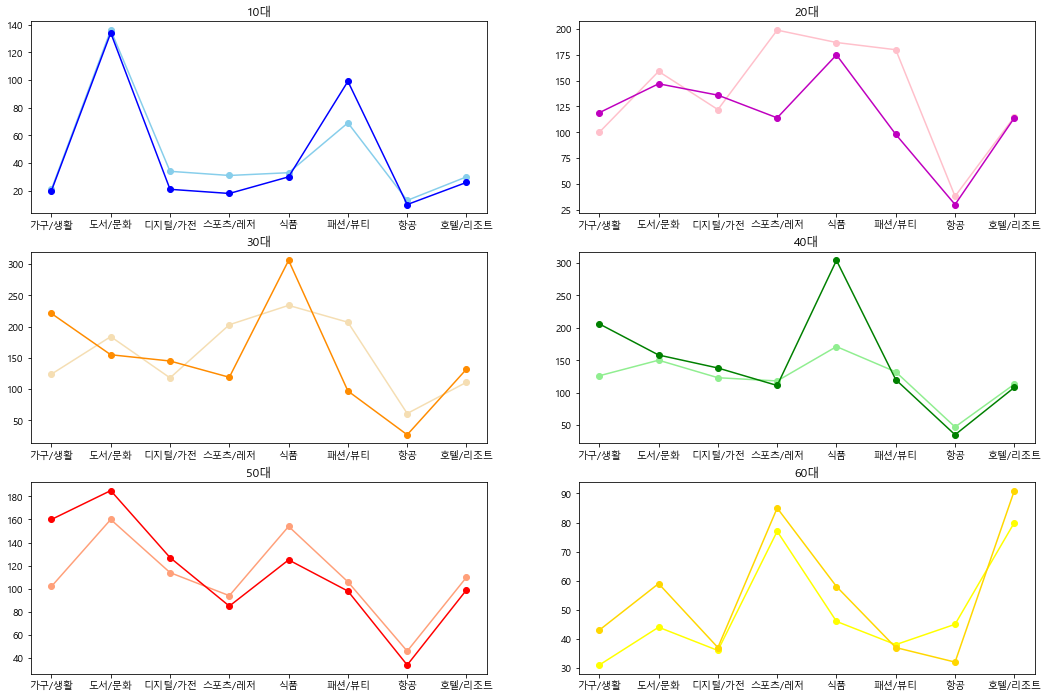

In [1263]:
fig=plt.figure(figsize=(18,12))
ax1=fig.add_subplot(3,2,1)   
ax1.plot(table7['10대'], marker='o', color='skyblue')
ax1.plot(table8['10대'], marker='o', color='blue')
ax1.set_title('10대')

ax2=fig.add_subplot(3,2,2)   
ax2.plot(table7['20대'], marker='o', color='pink')
ax2.plot(table8['20대'], marker='o', color='m')
ax2.set_title('20대')

ax2=fig.add_subplot(3,2,3)   
ax2.plot(table7['30대'], marker='o', color='wheat')
ax2.plot(table8['30대'], marker='o', color='darkorange')
ax2.set_title('30대')

ax2=fig.add_subplot(3,2,4)   
ax2.plot(table7['40대'], marker='o', color='lightgreen')
ax2.plot(table8['40대'], marker='o', color='green')
ax2.set_title('40대')

ax2=fig.add_subplot(3,2,5)   
ax2.plot(table7['50대'], marker='o', color='lightsalmon')
ax2.plot(table8['50대'], marker='o', color='red')
ax2.set_title('50대')

ax2=fig.add_subplot(3,2,6)   
ax2.plot(table7['60대'], marker='o', color='yellow')
ax2.plot(table8['60대'], marker='o', color='gold')
ax2.set_title('60대')

## 구매 감소 예측 모델

In [1264]:
#연도별 총 구매수량 및 총 구매액을 알기 위한 피벗테이블 작성

pd.options.display.float_format = '{:.2f}'.format    #과학적 표기법 x
table10=pd.pivot_table(df,
                     index=['cusno','gender','age_c'],
                     columns='year',
                     values='amount',
                     aggfunc=['count','sum']
                    )

table10.applymap(lambda x: f'{x:,.2f}').head(10)

count                  sum               
year                   2020  2021           2020           2021
cusno   gender age_c                                           
1001.00 female 30대     8.00  9.00  18,080,109.57  19,168,577.83
1002.00 female 30대    12.00  8.00  24,284,327.54   5,570,944.88
1003.00 male   50대     7.00  5.00  11,386,626.47   9,460,180.50
1004.00 male   30대     6.00  3.00  11,214,171.20   7,303,733.83
1005.00 female 30대     6.00  8.00   4,867,745.29   9,632,080.38
1006.00 male   60대     4.00   nan   8,067,255.42            nan
1007.00 female 60대     2.00  2.00   5,989,709.13   7,176,602.03
1008.00 male   50대     3.00  3.00   5,093,847.39   4,058,312.04
1009.00 male   50대     6.00  4.00  11,642,795.45   8,726,038.66
1010.00 female 10대     4.00   nan   4,513,277.69            nan

In [1265]:
#null값을 0으로 변경

table10.fillna(0,inplace=True)
table10['count']=table10['count'].astype(int)

In [1266]:
#(20-21)총 구매횟수 차이 구하기
table10['count_df']=table10.iloc[:,0]-table10.iloc[:,1]

#(20-21)총 구매액 차이 구하기
table10['amount_df']=table10.iloc[:,2]-table10.iloc[:,3]

#(20-21)총 구매액 증감율 구하기
table10['amount_df_per']=table10.iloc[:,3]/table10.iloc[:,2]

#20년 대비 구매액 증감율
table10['amount_df_per_20']=table10['amount_df']/table10.iloc[:,2]

#총 구매액이 증가했는지 여부 확인하는 sales 변수 생성
table10['sales']=np.where(table10['amount_df']>0,1,0)   #감소가 1

#21년도 이탈 고객 여부 변수 생성
table10['leave']=np.where(table10.iloc[:,1]==0,1,0)

#21년도 새로 유입된 고객 여부 변수 생성
table10['welcome']=np.where(table10.iloc[:,0]==0,1,0)



In [1271]:
# 컬럼이름 바꿔주고 인덱스 삭제

table10.columns=['count_2020','count_2021','amount_2020','amount_2021', 'count_df',
              'amount_df','amount_df_per','amount_df_per_20', 'sales','leave','welcome']
table10.reset_index(inplace=True)
table10.head()

,cusno,gender,age_c,count_2020,count_2021,amount_2020,amount_2021,count_df,amount_df,amount_df_per,amount_df_per_20,sales,leave,welcome
0,1001.00,female,30대,8,9,18080109.57,19168577.83,-1,-1088468.26,1.06,-0.06,0,0,0
1,1002.00,female,30대,12,8,24284327.54,5570944.88,4,18713382.66,0.23,0.77,1,0,0
2,1003.00,male,50대,7,5,11386626.47,9460180.50,2,1926445.97,0.83,0.17,1,0,0
3,1004.00,male,30대,6,3,11214171.20,7303733.83,3,3910437.37,0.65,0.35,1,0,0
4,1005.00,female,30대,6,8,4867745.29,9632080.38,-2,-4764335.09,1.98,-0.98,0,0,0


In [1272]:
#인코딩

from sklearn.preprocessing import LabelEncoder

table11=table10.copy()

le=LabelEncoder()
table11['gender']=le.fit_transform(table11[['gender']])
table11['age_c']=le.fit_transform(table11[['age_c']])


In [1273]:
table11.head()

,cusno,gender,age_c,count_2020,count_2021,amount_2020,amount_2021,count_df,amount_df,amount_df_per,amount_df_per_20,sales,leave,welcome
0,1001.00,0,2,8,9,18080109.57,19168577.83,-1,-1088468.26,1.06,-0.06,0,0,0
1,1002.00,0,2,12,8,24284327.54,5570944.88,4,18713382.66,0.23,0.77,1,0,0
2,1003.00,1,4,7,5,11386626.47,9460180.50,2,1926445.97,0.83,0.17,1,0,0
3,1004.00,1,2,6,3,11214171.20,7303733.83,3,3910437.37,0.65,0.35,1,0,0
4,1005.00,0,2,6,8,4867745.29,9632080.38,-2,-4764335.09,1.98,-0.98,0,0,0


In [1274]:
table11=table11[['sales','cusno','gender','age_c','count_df','amount_df',
              'leave','welcome']]
table11.head()

,sales,cusno,gender,age_c,count_df,amount_df,leave,welcome
0,0,1001.00,0,2,-1,-1088468.26,0,0
1,1,1002.00,0,2,4,18713382.66,0,0
2,1,1003.00,1,4,2,1926445.97,0,0
3,1,1004.00,1,2,3,3910437.37,0,0
4,0,1005.00,0,2,-2,-4764335.09,0,0


In [1275]:
table11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sales      999 non-null    int32  
 1   cusno      999 non-null    float64
 2   gender     999 non-null    int32  
 3   age_c      999 non-null    int32  
 4   count_df   999 non-null    int32  
 5   amount_df  999 non-null    float64
 6   leave      999 non-null    int32  
 7   welcome    999 non-null    int32  
dtypes: float64(2), int32(6)
memory usage: 39.1 KB


In [1276]:
table11.head()

,sales,cusno,gender,age_c,count_df,amount_df,leave,welcome
0,0,1001.00,0,2,-1,-1088468.26,0,0
1,1,1002.00,0,2,4,18713382.66,0,0
2,1,1003.00,1,4,2,1926445.97,0,0
3,1,1004.00,1,2,3,3910437.37,0,0
4,0,1005.00,0,2,-2,-4764335.09,0,0


In [1277]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


#독립변수, 종속변수 분리(변수는 바꿔도 됨!)
X = table11[['gender','age_c','count_df','amount_df',
            'leave','welcome']]
y = table11['sales']

# 학습용 테이터와 평가용 데이터를 8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, \
                                                    random_state=10) 
print(X_train.shape)
print(X_test.shape)


(799, 6)
(200, 6)


### 모델링 평가

In [1278]:
# Decision Tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print(dt_pred[0:10])
print(y_test.values[0:10])

accuracy = accuracy_score(y_test, dt_pred)
print('dt 예측 정확도 :', accuracy)

[1 0 0 1 1 0 1 0 1 0]
[1 0 0 1 1 0 1 0 1 0]
dt 예측 정확도 : 1.0


In [1279]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print('rf 예측 정확도 :', rf_accuracy)

rf 예측 정확도 : 1.0


In [1280]:
# Logistic Regression
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
print('lr 예측 정확도 :', accuracy)


lr 예측 정확도 : 1.0
